In [2]:
import os
from glob import glob
import re
import pandas as pd
import numpy as np
from re import search
from bs4 import BeautifulSoup as bs
from dataclasses import dataclass
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
import warnings
warnings.filterwarnings("ignore")

In [3]:
# get path of files
path = r'C:\Users\danar\Desktop\Year 3\ML\Car_Price_Prediction\data'
def get_files(path):
    f=[]
    files = os.listdir(path)
    for file in files:
        f.append(os.path.abspath(os.path.join(path,file)))
    return f

In [4]:
# keep valid files
all_files = glob('data/*txt')

with open('valid_files.txt', 'r') as f:
    valid_files = f.read().splitlines()

for file in all_files:
    if file not in valid_files:
        os.remove(file)

In [5]:
paths =[]
paths = get_files(path)

In [6]:
# parsing
HTML_data = []
for file in paths:
    with open(file) as f: 
        HTML_data.append(bs(f,"html.parser"))

In [7]:
@dataclass
class Features:
    name :str = None
    model_year : int = None
    color :str= None
    fuel :str= None
    origin : str= None
    bi_license :str= None
    gear_type :str= None
    bi_glass :str= None
    engine_power : float= None
    speedometer :float= None
    passenger_seat_no :int=None
    bi_payment_option :str= None
    status :str= None
    previous_owner :int= None
    bi_condition :str= None
    bi_lock_system :str= None
    bi_alert :str= None
    bi_radio :str= None
    bi_sunroof :str= None
    bi_wheels :str= None
    bi_seat_type :str= None
    bi_cushion :str= None
    price :int= None

In [8]:
def get_car_charactaristics(data):
    charactaristics_table = data.find_all(class_="list-row")[0:12]
    table_ =[]
    car_charactaristics =[]
    for row in charactaristics_table:
        table_.append(row.find_all("td"))
    for row in table_:
        car_charactaristics.append(row[1].string)
    return car_charactaristics

def get_extra_info(data):
    extras = data.find("ul")
    extras_ = []
    for li in extras.find_all("li"):
        extras_.append(li.string)
    return extras_

def get_date_info(data):
    date_table = data.find_all(class_="create_post")[2]
    date_table = date_table.find_all("tr")[1:3]
    date_table_ =  []
    date_values=[]
    for row in date_table:
        date_table_.append(row.find_all("td"))
    for row in date_table_:
        date_values.append(row[1].string)
    return date_values[0]

In [9]:
def get_car_charactaristics_features(data):
    charactaristics_table = data.find_all(class_="list-row")[0:12]
    table_ =[]
    car_features =[]
    for row in charactaristics_table:
        table_.append(row.find_all("td"))
    for row in table_:
        car_features.append(row[0].string)
    return car_features

In [10]:
# get the data and store it in feature
def get_car_name(data,car_obj):
    car_name = data.find('h3').string
    car_obj.name = car_name

def get_model_year(data,car_obj):
    temp = data.find('h5').string
    model_year = re.findall('[0-9]+', temp)
    car_obj.model_year = model_year
    
def get_car_price(data, car_obj):
    price_element = data.find(class_="post-price")
    price_element_detail = []
    for row in price_element:
        price_element_detail.append(row)

    car_price = re.findall('[0-9]+', price_element_detail[0])
    car_obj.price = car_price

In [11]:
# get the data and store it in feature
def car_charactaristics(data, car_obj):
    car_features = ['لون السيارة', 'نوع الوقود','أصل السيارة','رخصة السيارة','نوع الجير','الزجاج','قوة الماتور','عداد السيارة','عدد الركاب','وسيلة الدفع' ,'معروضة','أصحاب سابقون']
    current_features = get_car_charactaristics_features(data)
    feature_values  = get_car_charactaristics(data)
    for (feature, feature_value) in zip(current_features, feature_values):
        if feature == car_features[0]:
            car_obj.color = feature_value
        if feature == car_features[1]:
            car_obj.fuel = feature_value
        if feature == car_features[2]:
            car_obj.origin = feature_value
        if feature == car_features[3]:
            car_obj.bi_license = feature_value
        if feature == car_features[4]:
            car_obj.gear_type = feature_value
        if feature == car_features[5]:
            car_obj.bi_glass = feature_value
        if feature == car_features[6]:
            car_obj.engine_power = feature_value
        if feature == car_features[7]:
            car_obj.speedometer = feature_value
        if feature == car_features[8]:
            car_obj.passenger_seat_no = feature_value
        if feature == car_features[9]:
            car_obj.bi_payment_option = feature_value
        if feature == car_features[10]:
            car_obj.status = feature_value
        if feature == car_features[11]:
            car_obj.previous_owner = feature_value
        

In [12]:
# get the data and store it in feature lists
def car_extras(data,car_obj):
    for counter in range (len(get_extra_info(data))):
        data_features = ["مُكيّف", "إغلاق", "جهاز إنذار", "مسجل", "فتحة سقف", "جنطات","فرش","وسادة حماية هوائية"]
        features_value = get_extra_info(data)
        for feature in features_value:
            if feature in data_features[0]:
                car_obj.bi_condition = feature 
            for word in feature.split():
                if word in data_features[1]:
                    car_obj.bi_lock_system = feature 
            if feature in data_features[2]:
                car_obj.bi_alert = feature 
            for word in feature.split():
                if word in data_features[3]:
                    car_obj.bi_radio = feature 
            if feature in data_features[4]:
                car_obj.bi_sunroof = feature 
            for word in feature.split():
                if word in data_features[5]:
                    car_obj.bi_wheels = feature 
            for word in feature.split():
                if word in data_features[6]:
                    car_obj.bi_seat_type = feature 
            if feature in data_features[7]:
                car_obj.bi_cushion = feature 

In [13]:
data_ = [] # list of object that contain the data of single car
for data in HTML_data:
    counter = 0
    Car_ = Features()
    if (counter!=6864):
        get_car_name(data,Car_)
        get_model_year(data,Car_)
        car_charactaristics(data,Car_)
        car_extras(data,Car_)
        #car_publish_date(data,Car_)
        get_car_price(data,Car_)

    counter +=1
    data_.append(Car_)

In [14]:
df_ = []
for obj in data_:
    df_.append(obj.__dict__)
df = pd.DataFrame(df_)

In [15]:
df

,name,model_year,color,fuel,origin,bi_license,gear_type,bi_glass,engine_power,speedometer,...,previous_owner,bi_condition,bi_lock_system,bi_alert,bi_radio,bi_sunroof,bi_wheels,bi_seat_type,bi_cushion,price
0,كيا اوبتيما,[2014],أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,...,يد اولى,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,[100000]
1,كيا سورينتو,[2007],سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,...,2,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,[60000]
2,هونداي افانتي,[2006],سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,None,...,None,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,None,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,[43500]
3,فيات 127,[1982],بيج,بنزين,خصوصي,فلسطينية,عادي,يدوي,906,شغال,...,00,مُكيّف,None,None,مسجل CD,None,None,None,None,[5500]
4,بيجو 208,[2014],فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,...,None,مُكيّف,إغلاق مركزي,جهاز إنذار,None,None,جنطات مغنيسيوم,None,وسادة حماية هوائية,[54000]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,كيا مورننغ,[2015],فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000,...,2,مُكيّف,إغلاق مركزي,جهاز إنذار,None,None,جنطات مغنيسيوم,None,وسادة حماية هوائية,[45000]
6860,فورد ترانزيت,[2002],أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,...,None,None,None,None,None,None,None,None,None,[48000]
6861,بيجو بارتنر,[2018],فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,...,None,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,None,None,None,وسادة حماية هوائية,[87000]
6862,كيا سورينتو,[2017],بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,...,ثانيه,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,[126000]


### Preparing the data

In [16]:
#df['start_date'] = pd.to_datetime(df['start_date'])

In [17]:
df['model_year'] = df['model_year'].str.get(0)
df['price'] = df['price'].str.get(0)

In [18]:
df.drop([3], axis=0, inplace=True)

In [19]:
df.reset_index()

,index,name,model_year,color,fuel,origin,bi_license,gear_type,bi_glass,engine_power,...,previous_owner,bi_condition,bi_lock_system,bi_alert,bi_radio,bi_sunroof,bi_wheels,bi_seat_type,bi_cushion,price
0,0,كيا اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,...,يد اولى,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,100000
1,1,كيا سورينتو,2007,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,...,2,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,60000
2,2,هونداي افانتي,2006,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,...,None,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,None,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,43500
3,4,بيجو 208,2014,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,...,None,مُكيّف,إغلاق مركزي,جهاز إنذار,None,None,جنطات مغنيسيوم,None,وسادة حماية هوائية,54000
4,5,بي ام دبليو x3,2015,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,...,0,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6859,كيا مورننغ,2015,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,...,2,مُكيّف,إغلاق مركزي,جهاز إنذار,None,None,جنطات مغنيسيوم,None,وسادة حماية هوائية,45000
6859,6860,فورد ترانزيت,2002,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,...,None,None,None,None,None,None,None,None,None,48000
6860,6861,بيجو بارتنر,2018,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,...,None,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,None,None,None,وسادة حماية هوائية,87000
6861,6862,كيا سورينتو,2017,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,...,ثانيه,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,126000


### Checking Null values / Preparing Data

In [20]:
# Check unique values for each feature
obj = df.nunique()
for key,value in obj.iteritems():
    print(key,",",value)

name , 630
model_year , 54
color , 26
fuel , 4
origin , 6
bi_license , 2
gear_type , 3
bi_glass , 2
engine_power , 143
speedometer , 1261
passenger_seat_no , 43
bi_payment_option , 2
status , 3
previous_owner , 321
bi_condition , 1
bi_lock_system , 1
bi_alert , 1
bi_radio , 1
bi_sunroof , 1
bi_wheels , 1
bi_seat_type , 1
bi_cushion , 1
price , 473


In [21]:
# replace null values in columns that has one value with "لا يوجد"
one_value_df = ['bi_condition','bi_lock_system','bi_alert','bi_radio','bi_wheels','bi_seat_type','bi_cushion','bi_sunroof']
for column in one_value_df:
    df[column].fillna("لا يوجد", inplace=True)
df

,name,model_year,color,fuel,origin,bi_license,gear_type,bi_glass,engine_power,speedometer,...,previous_owner,bi_condition,bi_lock_system,bi_alert,bi_radio,bi_sunroof,bi_wheels,bi_seat_type,bi_cushion,price
0,كيا اوبتيما,2014,أبيض عاجي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,75000,...,يد اولى,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,100000
1,كيا سورينتو,2007,سكني,ديزل,خصوصي,فلسطينية,نصف اوتوماتيك,الكتروني,2500,130000,...,2,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,60000
2,هونداي افانتي,2006,سكني,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1600,None,...,None,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,لا يوجد,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,43500
4,بيجو 208,2014,فضي,بنزين,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1200,38000,...,None,مُكيّف,إغلاق مركزي,جهاز إنذار,لا يوجد,لا يوجد,جنطات مغنيسيوم,لا يوجد,وسادة حماية هوائية,54000
5,بي ام دبليو x3,2015,أسود,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2000,None,...,0,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6859,كيا مورننغ,2015,فيراني,كهرباء,خصوصي,فلسطينية,اوتوماتيك,الكتروني,1000,130000,...,2,مُكيّف,إغلاق مركزي,جهاز إنذار,لا يوجد,لا يوجد,جنطات مغنيسيوم,لا يوجد,وسادة حماية هوائية,45000
6860,فورد ترانزيت,2002,أبيض,ديزل,عمومي,فلسطينية,عادي,الكتروني,2400,00000,...,None,لا يوجد,لا يوجد,لا يوجد,لا يوجد,لا يوجد,لا يوجد,لا يوجد,لا يوجد,48000
6861,بيجو بارتنر,2018,فضي,ديزل,خصوصي,فلسطينية,عادي,الكتروني,1600,50000,...,None,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,لا يوجد,لا يوجد,لا يوجد,وسادة حماية هوائية,87000
6862,كيا سورينتو,2017,بترولي,ديزل,خصوصي,فلسطينية,اوتوماتيك,الكتروني,2200,100,...,ثانيه,مُكيّف,إغلاق مركزي,جهاز إنذار,مسجل CD,فتحة سقف,جنطات مغنيسيوم,فرش جلد,وسادة حماية هوائية,126000


In [22]:
obj = df.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

name , 0
model_year , 0
color , 0
fuel , 0
origin , 0
bi_license , 0
gear_type , 0
bi_glass , 0
engine_power , 0
speedometer , 1941
passenger_seat_no , 777
bi_payment_option , 0
status , 0
previous_owner , 2687
bi_condition , 0
bi_lock_system , 0
bi_alert , 0
bi_radio , 0
bi_sunroof , 0
bi_wheels , 0
bi_seat_type , 0
bi_cushion , 0
price , 0


In [23]:
# Drop column if Null data is greater than 50%
for i in df:
    if df[i].isnull().sum() >= (6863*0.5):
        df.drop([i],axis=1,inplace=True)

In [24]:
#df = df.applymap(lambda x: x.replace('\'', ''))

In [25]:
df['previous_owner']= df['previous_owner'].replace('يد أولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد أولى  ',1)
df['previous_owner']= df['previous_owner'].replace('ايد اولى ',1)
df['previous_owner']= df['previous_owner'].replace('اولى  ',1)
df['previous_owner']= df['previous_owner'].replace('اولى ',1)
df['previous_owner']= df['previous_owner'].replace('اولا ',1)
df['previous_owner']= df['previous_owner'].replace('يد أولى استيراد ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولي 1 ',1)
df['previous_owner']= df['previous_owner'].replace('واحد ',1)
df['previous_owner']= df['previous_owner'].replace('يد 1 ',1)
df['previous_owner']= df['previous_owner'].replace('أولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولا ',1)
df['previous_owner']= df['previous_owner'].replace('يداولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد أولى وكالة ',1)
df['previous_owner']= df['previous_owner'].replace('يدو اولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد واله ',1)
df['previous_owner']= df['previous_owner'].replace('اول ',1)
df['previous_owner']= df['previous_owner'].replace('يد ولا ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى شركة ',1)
df['previous_owner']= df['previous_owner'].replace('يد. اولى ',1)
df['previous_owner']= df['previous_owner'].replace('ياولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد اول  ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى وكالة ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى  اصل شركة ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولي ',1)
df['previous_owner']= df['previous_owner'].replace('يداولا ',1)
df['previous_owner']= df['previous_owner'].replace('أولى  ',1)
df['previous_owner']= df['previous_owner'].replace('وارد كوريا يد اولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد ولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى صفر كيلو  ',1)
df['previous_owner']= df['previous_owner'].replace('اوله  ',1)
df['previous_owner']= df['previous_owner'].replace('مستورده يد اولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد أولى بعد الاستيراد ',1)
df['previous_owner']= df['previous_owner'].replace('انا ',1)
df['previous_owner']= df['previous_owner'].replace('يد أولى 1 ',1)
df['previous_owner']= df['previous_owner'].replace('اولى\x89 ',1)
df['previous_owner']= df['previous_owner'].replace('اوله ',1)
df['previous_owner']= df['previous_owner'].replace('يد أولي ',1)
df['previous_owner']= df['previous_owner'].replace('يد اول ',1)
df['previous_owner']= df['previous_owner'].replace('ايد اولى  ',1)
df['previous_owner']= df['previous_owner'].replace('يد أولئ  ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى فقط ',1)
df['previous_owner']= df['previous_owner'].replace('يد أولى،... ',1)
df['previous_owner']= df['previous_owner'].replace('يد اوله ',1)
df['previous_owner']= df['previous_owner'].replace('فقط يد اولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد ا ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى، استيراد شخصي ',1)
df['previous_owner']= df['previous_owner'].replace('يدو اولى  ',1)
df['previous_owner']= df['previous_owner'].replace('ا ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولئ ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى ( شركة ) ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولا  ',1)
df['previous_owner']= df['previous_owner'].replace('يدأولى ',1)
df['previous_owner']= df['previous_owner'].replace('يد ١ ',1)
df['previous_owner']= df['previous_owner'].replace('يد واحدة  ',1)
df['previous_owner']= df['previous_owner'].replace('يداولى سحب شركه ',1)
df['previous_owner']= df['previous_owner'].replace('يد  ١ ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولي  ',1)
df['previous_owner']= df['previous_owner'].replace('4 نفس الشخص ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى من الشركة المتحدة ',1)
df['previous_owner']= df['previous_owner'].replace('يد اولى  ',1)

df['previous_owner']= df['previous_owner'].replace('ثانية ',2)
df['previous_owner']= df['previous_owner'].replace('ثانيه',2)
df['previous_owner']= df['previous_owner'].replace('ثانيه' ,2)
df['previous_owner']= df['previous_owner'].replace('يد ثانية ',2)
df['previous_owner']= df['previous_owner'].replace('يد ثانيه ',2)
df['previous_owner']= df['previous_owner'].replace('يد ثانيه  ',2)
df['previous_owner']= df['previous_owner'].replace('يد تانيه ',2)
df['previous_owner']= df['previous_owner'].replace(' يد ثانيه ',2)
df['previous_owner']= df['previous_owner'].replace('يد ثانية  ',2)
df['previous_owner']= df['previous_owner'].replace('يد 2 ',2)
df['previous_owner']= df['previous_owner'].replace('يدثانيه  ',2)
df['previous_owner']= df['previous_owner'].replace('ايد ثانيه ',2)
df['previous_owner']= df['previous_owner'].replace('يد ٢ ',2)
df['previous_owner']= df['previous_owner'].replace('اثنان ',2)
df['previous_owner']= df['previous_owner'].replace(' يد ثانية ',2)
df['previous_owner']= df['previous_owner'].replace('يد تاني ',2)
df['previous_owner']= df['previous_owner'].replace('يد ثني ',2)
df['previous_owner']= df['previous_owner'].replace('يدثانيه ',2)
df['previous_owner']= df['previous_owner'].replace('يد ثاتيه ',2)
df['previous_owner']= df['previous_owner'].replace('يد تانية ',2)
df['previous_owner']= df['previous_owner'].replace('ايد 2 ',2)
df['previous_owner']= df['previous_owner'].replace('أيد تانية ',2)
df['previous_owner']= df['previous_owner'].replace('يدثانية ',2)
df['previous_owner']= df['previous_owner'].replace('تانيه ',2)
df['previous_owner']= df['previous_owner'].replace('2يد  ',2)
df['previous_owner']= df['previous_owner'].replace('يدتانيه ',2)
df['previous_owner']= df['previous_owner'].replace('ثانية  ',2)
df['previous_owner']= df['previous_owner'].replace('يد ثاني ',2)
df['previous_owner']= df['previous_owner'].replace('ثانبه ',2)
df['previous_owner']= df['previous_owner'].replace('يد ثاني.  ',2)
df['previous_owner']= df['previous_owner'].replace('ايد ثانية  ',2)
df['previous_owner']= df['previous_owner'].replace('تانبه ',2)
df['previous_owner']= df['previous_owner'].replace('2يد ',2)
df['previous_owner']= df['previous_owner'].replace('يد٢ ',2)
df['previous_owner']= df['previous_owner'].replace('يد ثانيا ',2)
df['previous_owner']= df['previous_owner'].replace('تاني  ',2)
df['previous_owner']= df['previous_owner'].replace('يد2 ',2)
df['previous_owner']= df['previous_owner'].replace('ايدثانيه ',2)
df['previous_owner']= df['previous_owner'].replace('ثاني ',2)
df['previous_owner']= df['previous_owner'].replace('يد  ثانية ',2)
df['previous_owner']= df['previous_owner'].replace('يد تانيه  ',2)
df['previous_owner']= df['previous_owner'].replace('يديانيه ',2)
df['previous_owner']= df['previous_owner'].replace('الثانية ',2)
df['previous_owner']= df['previous_owner'].replace('يد تانية  ',2)
df['previous_owner']= df['previous_owner'].replace('يد ثاني  ',2)
df['previous_owner']= df['previous_owner'].replace('ثانيه ',2)

df['previous_owner']= df['previous_owner'].replace('0 ',0)
df['previous_owner']= df['previous_owner'].replace('صفر ',0)
df['previous_owner']= df['previous_owner'].replace('مش منمر ',0)
df['previous_owner']= df['previous_owner'].replace('0 مستورده ',0)
df['previous_owner']= df['previous_owner'].replace('غير منمر استيراد الماني ',0)
df['previous_owner']= df['previous_owner'].replace('غير منمره ',0)
df['previous_owner']= df['previous_owner'].replace('غير منمرة ',0)
df['previous_owner']= df['previous_owner'].replace('غير منمر  ',0)
df['previous_owner']= df['previous_owner'].replace('مستورد ',0)
df['previous_owner']= df['previous_owner'].replace('استيراد مباشر من كوريا  ',0)
df['previous_owner']= df['previous_owner'].replace('مش منمرة  ',0)
df['previous_owner']= df['previous_owner'].replace('مش منمره ',0)
df['previous_owner']= df['previous_owner'].replace('مش منمرة ',0)
df['previous_owner']= df['previous_owner'].replace('مش منمرا ',0)
df['previous_owner']= df['previous_owner'].replace('غير منمر ',0)
df['previous_owner']= df['previous_owner'].replace('مش منمر  ',0)
df['previous_owner']= df['previous_owner'].replace('مستوردة غير منمرة ',0)
df['previous_owner']= df['previous_owner'].replace('مستود غير منمر ',0)
df['previous_owner']= df['previous_owner'].replace('مستوردة غير مرخصة ',0)
df['previous_owner']= df['previous_owner'].replace('0مستورد ',0)
df['previous_owner']= df['previous_owner'].replace('لا يوجد ',0)
df['previous_owner']= df['previous_owner'].replace('لايوجد ',0)
df['previous_owner']= df['previous_owner'].replace('... ', 0)
df['previous_owner']= df['previous_owner'].replace('...... ', 0)
df['previous_owner']= df['previous_owner'].replace('- ', 0)
df['previous_owner']= df['previous_owner'].replace('******** ', 0)
df['previous_owner']= df['previous_owner'].replace('......... ',0)
df['previous_owner']= df['previous_owner'].replace('********** ',0)
df['previous_owner']= df['previous_owner'].replace('.. ',0)
df['previous_owner']= df['previous_owner'].replace('****** ',0)
df['previous_owner']= df['previous_owner'].replace('.... ',0)
df['previous_owner']= df['previous_owner'].replace('. ',0)
df['previous_owner']= df['previous_owner'].replace('يد صفر  ',0)
df['previous_owner']= df['previous_owner'].replace('يد صفر ',0)
df['previous_owner']= df['previous_owner'].replace('0استيراد  ',0)
df['previous_owner']= df['previous_owner'].replace('اصحاب سابقون صفر ',0)
df['previous_owner']= df['previous_owner'].replace('صفر  ',0)
df['previous_owner']= df['previous_owner'].replace('صفرض ',0)
df['previous_owner']= df['previous_owner'].replace('0 مستورد كوري ',0)
df['previous_owner']= df['previous_owner'].replace('غير منمرة  ',0)
df['previous_owner']= df['previous_owner'].replace('@ ',0)
df['previous_owner']= df['previous_owner'].replace('يد أولئ أصحاب سابقون صفر ',0)
df['previous_owner']= df['previous_owner'].replace('من الشركه مباشر لا يوجد اصحاب سابقون ',0)
df['previous_owner']= df['previous_owner'].replace('يد 0 ',0)
df['previous_owner']= df['previous_owner'].replace('استيراد مباشر من اوروبا  ',0)
df['previous_owner']= df['previous_owner'].replace('Ooo ',0)
df['previous_owner']= df['previous_owner'].replace('  O ',0)
df['previous_owner']= df['previous_owner'].replace('صفرر ',0)
df['previous_owner']= df['previous_owner'].replace('، 0 ',0)
df['previous_owner']= df['previous_owner'].replace('استيراد مباشر ',0)
df['previous_owner']= df['previous_owner'].replace('استيراد كوريا - جديد مش منمر ',0)
df['previous_owner']= df['previous_owner'].replace('0 استيراد كوري  ',0)
df['previous_owner']= df['previous_owner'].replace('لا شيء ',0)
df['previous_owner']=df['previous_owner'].replace('يد اولى اصحاب سابقون 0 ',0)



df['previous_owner']= df['previous_owner'].replace('يد ثالثة ',3)
df['previous_owner']= df['previous_owner'].replace('يد ثالثة  ',3)
df['previous_owner']= df['previous_owner'].replace('يد ثالثه ',3)
df['previous_owner']= df['previous_owner'].replace('ثالثة ',3)
df['previous_owner']= df['previous_owner'].replace('يد تالته ',3)
df['previous_owner']= df['previous_owner'].replace('يد ثالثة ( فتيات) ',3)
df['previous_owner']= df['previous_owner'].replace('يد 3 ',3)
df['previous_owner']= df['previous_owner'].replace('ثالثه ',3)
df['previous_owner']= df['previous_owner'].replace('ثالثة  ',3)
df['previous_owner']= df['previous_owner'].replace('يد ثالثه  ',3)
df['previous_owner']= df['previous_owner'].replace('يد3 ',3)
df['previous_owner']= df['previous_owner'].replace('يدثالثة ',3)
df['previous_owner']= df['previous_owner'].replace('يد ثالث ',3)
df['previous_owner']= df['previous_owner'].replace('عدد٣ ',3)
df['previous_owner']= df['previous_owner'].replace('تالته ',3)
df['previous_owner']= df['previous_owner'].replace('يد ٣ ',3)
df['previous_owner']= df['previous_owner'].replace('ثالث ',3)
df['previous_owner']= df['previous_owner'].replace('يدثالثه ',3)
df['previous_owner']= df['previous_owner'].replace('يد٣ ',3)
df['previous_owner']= df['previous_owner'].replace('يد التالته ',3)
df['previous_owner']= df['previous_owner'].replace(' ايد ثالثه ',3)
df['previous_owner']= df['previous_owner'].replace('تالثه ',3)
df['previous_owner']= df['previous_owner'].replace('ايد ثالثة  ',3)
df['previous_owner']= df['previous_owner'].replace('يد ثالثي ',3)
df['previous_owner']= df['previous_owner'].replace('ثالثى ',3)


df['previous_owner']= df['previous_owner'].replace('رابعه ',4)
df['previous_owner']= df['previous_owner'].replace('يد رابعة  ',4)
df['previous_owner']= df['previous_owner'].replace('يد رابعه ',4)
df['previous_owner']= df['previous_owner'].replace('يد 4 ',4)
df['previous_owner']= df['previous_owner'].replace('يد رابعة ',4)
df['previous_owner']= df['previous_owner'].replace('رابعة ',4)
df['previous_owner']= df['previous_owner'].replace('يد4 ',4)
df['previous_owner']= df['previous_owner'].replace('يد ٤ ',4)
df['previous_owner']= df['previous_owner'].replace('يد ٤ بس نخب السيارة ',4)
df['previous_owner']= df['previous_owner'].replace('يد٤ ',4)
df['previous_owner']= df['previous_owner'].replace('يد رابعه  ',4)
df['previous_owner']= df['previous_owner'].replace('ايد رابعه ',4)
df['previous_owner']= df['previous_owner'].replace('يد اربعه ',4)
df['previous_owner']= df['previous_owner'].replace('رابعه  ',4)
df['previous_owner']= df['previous_owner'].replace('اربعة ',4)

df['previous_owner']= df['previous_owner'].replace('يد خامسة ',5)
df['previous_owner']= df['previous_owner'].replace('يد 5 ',5)
df['previous_owner']= df['previous_owner'].replace('يد خامسة ',5)
df['previous_owner']= df['previous_owner'].replace('يد خامسة ',5)
df['previous_owner']= df['previous_owner'].replace('يد خامسة ',5)
df['previous_owner']= df['previous_owner'].replace('يد خامسه ',5)
df['previous_owner']= df['previous_owner'].replace('يد خامساً  ',5)
df['previous_owner']= df['previous_owner'].replace('يد خامسة  ',5)
df['previous_owner']= df['previous_owner'].replace('يد خمسة ',5)
df['previous_owner']= df['previous_owner'].replace('خمسه ',5)
df['previous_owner']= df['previous_owner'].replace('يدخامسه ',5)
df['previous_owner']= df['previous_owner'].replace('خمسة ',5)
df['previous_owner']= df['previous_owner'].replace('خامسة ',5)
df['previous_owner']= df['previous_owner'].replace('خمس ',5)
df['previous_owner']= df['previous_owner'].replace('خامسه ',5)
df['previous_owner']= df['previous_owner'].replace('يد٥ ',5)
df['previous_owner']= df['previous_owner'].replace('يد ٥ ',5)



df['previous_owner']= df['previous_owner'].replace('يد سادسة ',6)
df['previous_owner']= df['previous_owner'].replace('يد6 ',6)
df['previous_owner']= df['previous_owner'].replace('يد 6 ',6)



df['previous_owner']= df['previous_owner'].replace('يد سابعة ',7)
df['previous_owner']= df['previous_owner'].replace('يد سابعه ',7)
df['previous_owner']= df['previous_owner'].replace('يد ٧  ',7)
df['previous_owner']= df['previous_owner'].replace('سابعه ',7)



df['previous_owner']= df['previous_owner'].replace('يد ثامنه ',8)
df['previous_owner']= df['previous_owner'].replace('ثمانيه ',8)
df['previous_owner']= df['previous_owner'].replace('يد 8 ',8)


df['previous_owner']= df['previous_owner'].replace('يد تاسعة ',9)
df['previous_owner']= df['previous_owner'].replace('يد ٩  ',9)

df['previous_owner']= df['previous_owner'].replace('يد عاشره ',10)
df['previous_owner']= df['previous_owner'].replace('يد عاشرة ',10)


df['previous_owner']= df['previous_owner'].replace('يد ١٧ ',17)
df['previous_owner']= df['previous_owner'].replace('نعم ', 1)
df['previous_owner']= df['previous_owner'].replace('للبيع  ',1)
df['previous_owner']= df['previous_owner'].replace(' منمره  ',1)
df['previous_owner']= df['previous_owner'].replace('مستورد شركة  ',1)
df['previous_owner']= df['previous_owner'].replace('مستورده  ',1)
df['previous_owner']= df['previous_owner'].replace('مستوردة ',1)
df['previous_owner']= df['previous_owner'].replace('استيراد الماني ',1)
df['previous_owner']= df['previous_owner'].replace(' استيراد الماني ',1)
df['previous_owner']= df['previous_owner'].replace('استراد شخصي ',1)
df['previous_owner']= df['previous_owner'].replace('استيراد كوري ',1)
df['previous_owner']= df['previous_owner'].replace('استيراد ',1)
df['previous_owner']= df['previous_owner'].replace('استيراد كوريا ',1)
df['previous_owner']= df['previous_owner'].replace('وارد المانيا ',1)
df['previous_owner']= df['previous_owner'].replace('استراد  ',1)
df['previous_owner']= df['previous_owner'].replace('اصل تدريب سواقه  ',1)
df['previous_owner']= df['previous_owner'].replace('اشخاص ',1)
df['previous_owner']= df['previous_owner'].replace('سحب شركة ',1)
df['previous_owner']= df['previous_owner'].replace('شطب ',1)
df['previous_owner']= df['previous_owner'].replace('مستورد  ',1)
df['previous_owner']= df['previous_owner'].replace('مستورده ',1)
df['previous_owner']= df['previous_owner'].replace('اصل شركة ',1)
df['previous_owner']= df['previous_owner'].replace('؟ ',1)
df['previous_owner']= df['previous_owner'].replace('E ',1)
df['previous_owner']= df['previous_owner'].replace('مشطوب ',1)
df['previous_owner']= df['previous_owner'].replace('خصوصي  ',1)
df['previous_owner']= df['previous_owner'].replace("None",2)

In [26]:
df['price']= df['price'].apply(pd.to_numeric)
df['engine_power']= df['engine_power'].apply(pd.to_numeric)
df['model_year']= df['model_year'].apply(pd.to_numeric)

In [27]:
df['previous_owner'] = df['previous_owner'].astype('str')
df['speedometer'] = df['speedometer'].astype('str')

In [28]:
def remover_km():
    kms = ['كم', 'km','كيلو', 'كيلو متر','كيلومتر ']
    for value in df['speedometer']:
        for km in kms:
            if search(km,value):
                df['speedometer'].replace(km,'')
remover_km()

In [29]:
def converter_ (column):
    strings = ['الف', 'آلف', 'ألف', 'الاف']
    for value in df[column]:
        if search(strings[0],value):
            number = re.findall('[\d]+', value)
            number = int(float(('.'.join(number))))
            modified = number*1000
            df[column].replace(value,int(modified))
        if search(strings[1],value):
            number = re.findall('[\d]+', value)
            number = int(float(('.'.join(number))))
            modified = number*1000
            df[column].replace(value,(modified))
        if search(strings[2],value):
            number = re.findall('[\d]+', value)
            number = int(float(('.'.join(number))))
            modified = number*1000
            df[column].replace(value,(modified))
        if search(strings[3],value):
            number = re.findall('[\d]+', value)
            number = int(float(('.'.join(number))))
            modified = number*1000
            df[column].replace(value,(modified))
#(df.loc[df[column].str.contains(strings[3], case=False)])
converter_('speedometer')

In [30]:
def passenger_seat_summation():
    df['passenger_seat_no'] = df['passenger_seat_no'].replace('اكثر من 10 ',10)
    seat_ = []
    for value in df['passenger_seat_no']:
        if value == None:
            seat_.append(None)
        for element in str(value):
            if element.isdigit():
                number = int(element)
                sum_ = int(number+1)
                seat_.append(sum_)
                break
    df['passenger_seat_no'] =  seat_


passenger_seat_summation()

In [31]:
df['speedometer'] = df['speedometer'].replace("None", None)
df['speedometer'] = df['speedometer'].replace(np.NaN,None)
df['speedometer']=df['speedometer'].str.replace('،','')
df['speedometer']=df['speedometer'].str.replace(',','')
df['speedometer']=df['speedometer'].str.replace('.', '')
df['speedometer'] = df['speedometer'].replace('120 الف ',120000)
df['speedometer'] = df['speedometer'].replace('120000قابل لزيادة  ',120000)
df['speedometer'] = df['speedometer'].replace('80 الف ',80000)
df['speedometer'] = df['speedometer'].replace('150 الف  ',150000)
df['speedometer'] = df['speedometer'].replace('5400  كيلو ',5400)
df['speedometer'] = df['speedometer'].replace('130000كم ',130000)
df['speedometer'] = df['speedometer'].replace('متور جديد  ',0)
df['speedometer'] = df['speedometer'].replace('19000 الف كيلو متر ',19000)
df['speedometer'] = df['speedometer'].replace('١٣٠ الف ',130000)
df['speedometer'] = df['speedometer'].replace('79الف فقط ',79000)
df['speedometer'] = df['speedometer'].replace('142الف ',142000)
df['speedometer'] = df['speedometer'].replace('٣٢ الف فقط ',32000)
df['speedometer'] = df['speedometer'].replace('10000 كيلو متر ',10000)
df['speedometer'] = df['speedometer'].replace('200 الف ',200000)
df['speedometer'] = df['speedometer'].replace('- ',None)
df['speedometer'] = df['speedometer'].replace('شغال ',None)
df['speedometer'] = df['speedometer'].replace('100الف ',100000)
df['speedometer'] = df['speedometer'].replace('٣٠٠ الف ',300000)
df['speedometer'] = df['speedometer'].replace('٤٩٠٠٠ كيلو متر ',49000)
df['speedometer'] = df['speedometer'].replace('60الف ',60000)
df['speedometer'] = df['speedometer'].replace('47 الف ',47000)
df['speedometer'] = df['speedometer'].replace('90000 كيلو ',90000)
df['speedometer'] = df['speedometer'].replace('000 كيلو متر ',0)
df['speedometer'] = df['speedometer'].replace('140 الف كيلو متر  ',140000)
df['speedometer'] = df['speedometer'].replace('٠٠٠٠٠٠٠٠٠٠٠٠ ',)
df['speedometer'] = df['speedometer'].replace('000000000 ',0)
df['speedometer'] = df['speedometer'].replace('..... ',None)
df['speedometer'] = df['speedometer'].replace('16000 كم ',16000)
df['speedometer'] = df['speedometer'].replace('.... ',None)
df['speedometer'] = df['speedometer'].replace('واحد ',1)
df['speedometer'] = df['speedometer'].replace('5500 كيلومتر ',5500)
df['speedometer'] = df['speedometer'].replace('40 الف ',40000)
df['speedometer'] = df['speedometer'].replace('80الف ',80000)
df['speedometer'] = df['speedometer'].replace('................ ',None)
df['speedometer'] = df['speedometer'].replace('00 ',)
df['speedometer'] = df['speedometer'].replace('٠٠٠ ',None)
df['speedometer'] = df['speedometer'].replace('******** ',None)
df['speedometer'] = df['speedometer'].replace('0000000000 ',0)
df['speedometer'] = df['speedometer'].replace('75000كيلو متر ',75000)
df['speedometer'] = df['speedometer'].replace('91 الف ',91000)
df['speedometer'] = df['speedometer'].replace('150 الف ',150000)
df['speedometer'] = df['speedometer'].replace('180 كيلومتر ',180)
df['speedometer'] = df['speedometer'].replace('18كم ',18)
df['speedometer'] = df['speedometer'].replace('105000كيلو متر  ',105000)
df['speedometer'] = df['speedometer'].replace('60 الف كيلو متر ',60000)
df['speedometer'] = df['speedometer'].replace('80000 Km ',80000)
df['speedometer'] = df['speedometer'].replace('27الف كيلو ',27000)
df['speedometer'] = df['speedometer'].replace('ما انتبهت ',None)
df['speedometer'] = df['speedometer'].replace('78 الف ',78000)
df['speedometer'] = df['speedometer'].replace('١٤٣ الف ',143000)
df['speedometer'] = df['speedometer'].replace('100 الف كيلو ',100000)
df['speedometer'] = df['speedometer'].replace('230 الف كيلو متر  ',230000)
df['speedometer'] = df['speedometer'].replace('50000 كيلو ',50000)
df['speedometer'] = df['speedometer'].replace('230000 كيلو متر ',230000)
df['speedometer'] = df['speedometer'].replace('صفر كيلو ',0)
df['speedometer'] = df['speedometer'].replace('____ ',None)
df['speedometer'] = df['speedometer'].replace('٣١٩٧٦٣ كم ',319763)
df['speedometer'] = df['speedometer'].replace('87400 كيلو ',87400)
df['speedometer'] = df['speedometer'].replace('٧٠٠٠٠ الف كيلو ',70000)
df['speedometer'] = df['speedometer'].replace('112 الف كيلو ',112000)
df['speedometer'] = df['speedometer'].replace('92الف كيلو ',92000)
df['speedometer'] = df['speedometer'].replace('اكثر من سيارة ',None)
df['speedometer'] = df['speedometer'].replace('٣٥ الف كيلو ',35000)
df['speedometer'] = df['speedometer'].replace('190000 كيلومتر ',190000)
df['speedometer'] = df['speedometer'].replace('١٢٣٤٥٦٧٧ ',None)
df['speedometer'] = df['speedometer'].replace('شغال  ',None)
df['speedometer'] = df['speedometer'].replace('......... ',None)
df['speedometer'] = df['speedometer'].replace('٢١٠ الاف ',210000)
df['speedometer'] = df['speedometer'].replace('47 الف  ',47000)
df['speedometer'] = df['speedometer'].replace('350 الف  ',350000)
df['speedometer'] = df['speedometer'].replace('140 الف ',14000)
df['speedometer'] = df['speedometer'].replace('... ',None)
df['speedometer'] = df['speedometer'].replace('90000الف فقط ',90000)
df['speedometer'] = df['speedometer'].replace('62000 كيلومتر ',62000)
df['speedometer'] = df['speedometer'].replace('100000 كيلو متر ',100000)
df['speedometer'] = df['speedometer'].replace('١٩ الف سنويا ',19000)
df['speedometer'] = df['speedometer'].replace('٩٨ الف ',98000)
df['speedometer'] = df['speedometer'].replace('19000 كيلومتير ',19000)
df['speedometer'] = df['speedometer'].replace('39000الف كيلو متر  ',39000)
df['speedometer'] = df['speedometer'].replace('لا  ا\u200fعلم  ',None)
df['speedometer'] = df['speedometer'].replace('_ ',None)
df['speedometer'] = df['speedometer'].replace('٥٤٥٦٦كيلو متر ',54566)
df['speedometer'] = df['speedometer'].replace('70000 كيلو ',70000)
df['speedometer'] = df['speedometer'].replace('42 الف ',42000)
df['speedometer'] = df['speedometer'].replace('     ٠ ٢٠٠٠  ',20000)
df['speedometer'] = df['speedometer'].replace('٦٥٠٠٠ كيلو متر  ',65000)
df['speedometer'] = df['speedometer'].replace('65 الف  ',65000)
df['speedometer'] = df['speedometer'].replace('145000 كيلو متر ',145000)
df['speedometer'] = df['speedometer'].replace('٧٠ الف  ',70000)
df['speedometer'] = df['speedometer'].replace('........... ',None)
df['speedometer'] = df['speedometer'].replace('42000 Mil ',67592)
df['speedometer'] = df['speedometer'].replace('91 الف كم ',91000)
df['speedometer'] = df['speedometer'].replace('****** ',None)
df['speedometer'] = df['speedometer'].replace('٠٠٠٠٠٠٠ ',None)
df['speedometer'] = df['speedometer'].replace('58000 كيلو متر  ',58000)
df['speedometer'] = df['speedometer'].replace('52000 كيلو  ',52000)
df['speedometer'] = df['speedometer'].replace('130الف ',130000)
df['speedometer'] = df['speedometer'].replace('١٣٠٠٠٠ كيلومتر ',130000)
df['speedometer'] = df['speedometer'].replace('ماشيه 80الف كم  ',80000)
df['speedometer'] = df['speedometer'].replace('15 الف ',15000)
df['speedometer'] = df['speedometer'].replace('71000 كم ',71000)
df['speedometer'] = df['speedometer'].replace('190الف ',190000)
df['speedometer'] = df['speedometer'].replace('٧٠ الف ',70000)
df['speedometer'] = df['speedometer'].replace('٧٥٠ كيلو  ',750)
df['speedometer'] = df['speedometer'].replace('130000 كيلو متر ',130000)
df['speedometer'] = df['speedometer'].replace('275 ألف كم ',)
df['speedometer'] = df['speedometer'].replace('000000000000 ',0)
df['speedometer'] = df['speedometer'].replace('00000000000 ',0)
df['speedometer'] = df['speedometer'].replace('0 صفر كيلو ',0)
df['speedometer'] = df['speedometer'].replace('203000كيلو متر  ',203000)
df['speedometer'] = df['speedometer'].replace('٠٠٠٠٠٠٠٠٠٠٠ ',None)
df['speedometer'] = df['speedometer'].replace('88000 كيلو متر  ',88000)
df['speedometer'] = df['speedometer'].replace('٠٠ ',None)
df['speedometer'] = df['speedometer'].replace('١٢٠ الف ',120000)
df['speedometer'] = df['speedometer'].replace('٠٠٠٠٠٠٠٠٠٠  ',None)
df['speedometer'] = df['speedometer'].replace('79000 كيلومتر ',79000)
df['speedometer'] = df['speedometer'].replace('20 الف ',20000)
df['speedometer'] = df['speedometer'].replace('60000 كيلو متر  ',60000)
df['speedometer'] = df['speedometer'].replace('80000 فقط ',80000)
df['speedometer'] = df['speedometer'].replace('مش كتير ',  None)
df['speedometer'] = df['speedometer'].replace('٨٠ الف ',None)
df['speedometer'] = df['speedometer'].replace('… .. ',None)
df['speedometer'] = df['speedometer'].replace('60 الف ',60000)
df['speedometer'] = df['speedometer'].replace('42الف ',42000)
df['speedometer'] = df['speedometer'].replace('١٧٠ الف ',170000)
df['speedometer'] = df['speedometer'].replace('49000كيلو متر ',49000)
df['speedometer'] = df['speedometer'].replace('35 الف كيلو ',35000)
df['speedometer'] = df['speedometer'].replace('59000 كيلو ',59000)
df['speedometer'] = df['speedometer'].replace('150000 كيلو متر ',150000)
df['speedometer'] = df['speedometer'].replace('82الف ',82000)
df['speedometer'] = df['speedometer'].replace('99500 كم ',)
df['speedometer'] = df['speedometer'].replace('160 الف ',160000)
df['speedometer'] = df['speedometer'].replace('450الف  ',450000)
df['speedometer'] = df['speedometer'].replace('100000 كيلو ',100000)
df['speedometer'] = df['speedometer'].replace('صفر ..كيلو ',0)
df['speedometer'] = df['speedometer'].replace('عداد غير حقيقي ',None)
df['speedometer'] = df['speedometer'].replace('150الف ',150000)
df['speedometer'] = df['speedometer'].replace('٩ الاف كيلو ',)
df['speedometer'] = df['speedometer'].replace('١٥٢الف ',152000)
df['speedometer'] = df['speedometer'].replace('285 الف ',285000)
df['speedometer'] = df['speedometer'].replace('115000 كم ',115000)
df['speedometer'] = df['speedometer'].replace('180.000الف ',180000)
df['speedometer'] = df['speedometer'].replace('١٩٠ الف ',190000)
df['speedometer'] = df['speedometer'].replace('00000000ج ',None)
df['speedometer'] = df['speedometer'].replace('١٥٠الف ',150000)
df['speedometer'] = df['speedometer'].replace('50,000 km ',50000)
df['speedometer'] = df['speedometer'].replace('٧٩ الف  ',79000)
df['speedometer'] = df['speedometer'].replace('32 الف ',32000)
df['speedometer'] = df['speedometer'].replace('120 الف كيلو ',120000)
df['speedometer'] = df['speedometer'].replace('83,000 كيلومتر ',83000)
df['speedometer'] = df['speedometer'].replace('٢٣ الف ',23000)
df['speedometer'] = df['speedometer'].replace('43 ألف كيلومتر ',43000)
df['speedometer'] = df['speedometer'].replace('300 الف  ',300000)
df['speedometer'] = df['speedometer'].replace('80آلف ',80000)
df['speedometer'] = df['speedometer'].replace('116 الف ماشيه  ',116000)
df['speedometer'] = df['speedometer'].replace('١٦٠ الف ك ',160000)
df['speedometer'] = df['speedometer'].replace('118 الف ',118000)
df['speedometer'] = df['speedometer'].replace('40 الف فقط ',40000)
df['speedometer'] = df['speedometer'].replace('جديد ',0)
df['speedometer'] = df['speedometer'].replace('١٣٠ الاف ',13000)
df['speedometer'] = df['speedometer'].replace('90 الف ',90000)
df['speedometer'] = df['speedometer'].replace('٩٠ الف فقط  ',90000)
df['speedometer'] = df['speedometer'].replace('..........o......... ',None)
df['speedometer'] = df['speedometer'].replace('٢٣٠ الف كيلو ',)
df['speedometer'] = df['speedometer'].replace('110000 كم ',110000)
df['speedometer'] = df['speedometer'].replace('٢٠٠الف ' ,200000)
df['speedometer'] = df['speedometer'].replace('18الف فقط ',18000)
df['speedometer'] = df['speedometer'].replace('ماشيه 140 الف كم ',140000)
df['speedometer'] = df['speedometer'].replace('............... ',None)
df['speedometer'] = df['speedometer'].replace('٢٨٠ الف كيلو ',280000)
df['speedometer'] = df['speedometer'].replace('1000000كم ',1000000)
df['speedometer'] = df['speedometer'].replace('112 الف  ',112000)
df['speedometer'] = df['speedometer'].replace('73 ألف كيلو ',73000)
df['speedometer'] = df['speedometer'].replace('  0000 ',0)
df['speedometer'] = df['speedometer'].replace('00”” ',0)
df['speedometer'] = df['speedometer'].replace('صفر ',0)
df['speedometer'] = df['speedometer'].replace('89 الف ',89000)
df['speedometer'] = df['speedometer'].replace('57000 فقط ',57000)
df['speedometer'] = df['speedometer'].replace('130000 كيلومتر ',130000)
df['speedometer'] = df['speedometer'].replace('........   ',None)
df['speedometer'] = df['speedometer'].replace('120الف ',120000)
df['speedometer'] = df['speedometer'].replace('55000km ',55000)
df['speedometer'] = df['speedometer'].replace('٠٠٠٠٠٠٠٠٠٩ ',None)
df['speedometer'] = df['speedometer'].replace('ش ',None)
df['speedometer'] = df['speedometer'].replace('1 الف ',1000)
df['speedometer'] = df['speedometer'].replace('148 الف كيلو ',148000)
df['speedometer'] = df['speedometer'].replace('68000 كم ',68000)
df['speedometer'] = df['speedometer'].replace('60000 كيلو متر ',60000)
df['speedometer'] = df['speedometer'].replace('67000 كيلو متر ',67000)
df['speedometer'] = df['speedometer'].replace('26 الف كيلو  ',26000)
df['speedometer'] = df['speedometer'].replace('85 الف ',85000)
df['speedometer'] = df['speedometer'].replace('135 الف ',135000)
df['speedometer'] = df['speedometer'].replace('13000 كم ',13000)
df['speedometer'] = df['speedometer'].replace('24000 كم ',24000)
df['speedometer'] = df['speedometer'].replace('٧٠الف ',70000)
df['speedometer'] = df['speedometer'].replace(' ',None)
df['speedometer'] = df['speedometer'].replace('170 ألف كيلو  ',170000)
df['speedometer'] = df['speedometer'].replace('!!!! ',None)
df['speedometer'] = df['speedometer'].replace('٤٩٠٠٠ كيلو متر ',49000)
df['speedometer'] = df['speedometer'].replace('100 الف ',100000)
df['speedometer'] = df['speedometer'].replace('95  الف  ',95000)
df['speedometer'] = df['speedometer'].replace('13000 كم ',13000)
df['speedometer'] = df['speedometer'].replace('24000 كم ',24000)
df['speedometer'] = df['speedometer'].replace('٧٠الف ',70000)
df['speedometer'] = df['speedometer'].replace('...... ',None)
df['speedometer'] = df['speedometer'].replace('170 ألف كيلو  ',170000)
df['speedometer'] = df['speedometer'].replace('٦٦الف  ',66000)
df['speedometer'] = df['speedometer'].replace('٦٥الف كيلو ',65000)
df['speedometer'] = df['speedometer'].replace('…  ',None)
df['speedometer'] = df['speedometer'].replace('50000 km ',50000)
df['speedometer'] = df['speedometer'].replace('٩٠ الف ',90000)
df['speedometer'] = df['speedometer'].replace('200الف ',200000)
df['speedometer'] = df['speedometer'].replace('73000km عداد اصلي ',73000)
df['speedometer'] = df['speedometer'].replace('؟ ',None)
df['speedometer'] = df['speedometer'].replace('٨٠٠٠٠الف كيلو ',80000)
df['speedometer'] = df['speedometer'].replace('64000km ',64000)
df['speedometer'] = df['speedometer'].replace('128 الف ',128000)
df['speedometer'] = df['speedometer'].replace('200000 كيلومتر ',200000)
df['speedometer'] = df['speedometer'].replace('20.000 الف  ',20000)
df['speedometer'] = df['speedometer'].replace('٢٠٠ الف ',200000)
df['speedometer'] = df['speedometer'].replace('70 km ',70)
df['speedometer'] = df['speedometer'].replace('،٢٥٠ ',250)
df['speedometer'] = df['speedometer'].replace('٢٢٠الف كيلو ',220000)
df['speedometer'] = df['speedometer'].replace('200 الف ',200000)
df['speedometer'] = df['speedometer'].replace('٣٢ الف فقط ',32000)
df['speedometer'] = df['speedometer'].replace('130 الف ',13000)
df['speedometer'] = df['speedometer'].replace('115 الف ',115000)
df['speedometer'] = df['speedometer'].replace('390 الف ',39000)
df['speedometer'] = df['speedometer'].replace('١٠٠٠٠كيلو متر  ',10000)
df['speedometer'] = df['speedometer'].replace('320  ألف ',320000)
df['speedometer'] = df['speedometer'].replace('0010000001 ',None)
df['speedometer'] = df['speedometer'].replace('00658 ',None)
df['speedometer'] = df['speedometer'].replace('0010000001 ',None)
df['speedometer'] = df['speedometer'].replace('١٠٠٠٠كيلو متر  ',10000)
df['speedometer'] = df['speedometer'].replace('.360000000 ',None)
df['speedometer'] = df['speedometer'].replace('320  ألف ',320000)
df['speedometer'] = df['speedometer'].replace('180000الف ',180000)
df['speedometer'] = df['speedometer'].replace('83000 كيلومتر ',83000)
df['speedometer'] = df['speedometer'].replace('o ',None)
df['speedometer'] = df['speedometer'].replace('   ',None)
df['speedometer'] = df['speedometer'].replace('20000 الف  ',20000)




In [32]:
df['passenger_seat_no'] = df['passenger_seat_no'].replace("None",None)
df['passenger_seat_no'] = df['passenger_seat_no'].replace('None', None)

In [33]:
# Fill null data
def fill_null_values(dataframe):
    for column in dataframe:
        if dataframe[column].isnull().sum()>=1:
            if(dataframe[column].dtype == np.float64 or dataframe[column].dtype == np.int64):
                dataframe[column].fillna((dataframe[column].mean()),inplace=True)
            else:
                dataframe[column].fillna(dataframe[column].mode()[0],inplace=True)
    return dataframe

df=fill_null_values(df)

In [34]:
df['speedometer'].fillna(10000, inplace=True)
df['passenger_seat_no'].fillna(5, inplace=True)
df['previous_owner'].fillna(2,inplace=True)

In [35]:
df['passenger_seat_no'] = df['passenger_seat_no'].astype('int64')
df['speedometer'] = df['speedometer'].astype('float64')
df['speedometer']= df['speedometer'].apply(pd.to_numeric)

In [36]:
df['previous_owner'] = df['previous_owner'].replace("None",2)
df['previous_owner'] = df['previous_owner'].astype('int64')

### Data Visualization ( for numeric data )

In [63]:
# res = df.groupby(df['start_date'].dt.month).count().reindex(np.arange(24), fill_value=0)
# res.plot(kind="bar")
# plt.show()

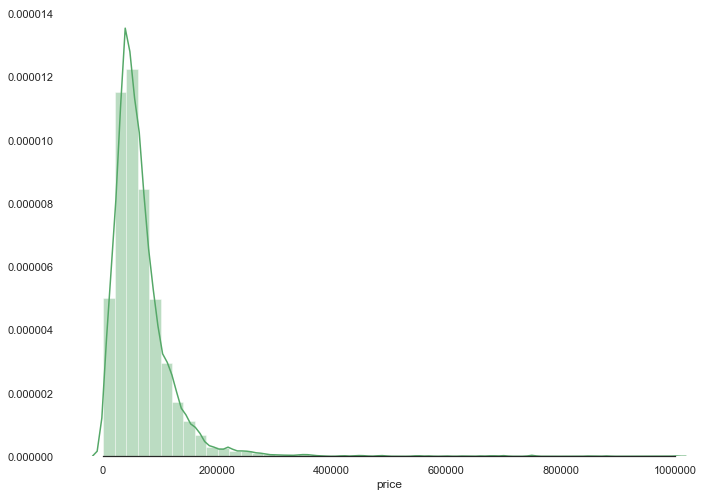

In [37]:
# Graphic presentation of the target_variable (price)
sns.set_style("white")
sns.set_color_codes(palette = 'deep')
plot = sns.distplot(df['price'], color = 'g')
sns.despine(trim = True, left = True)
plt.show()
# visualization let us see the outliers
# helps us to tranform it to normal distribution if needed

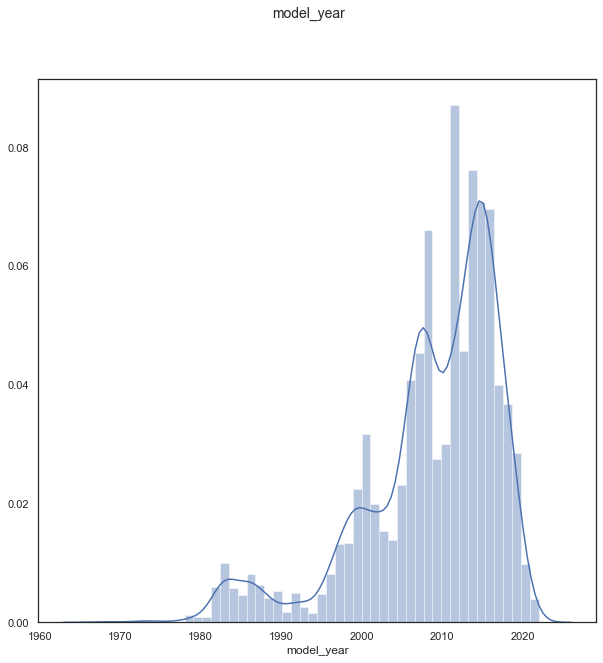

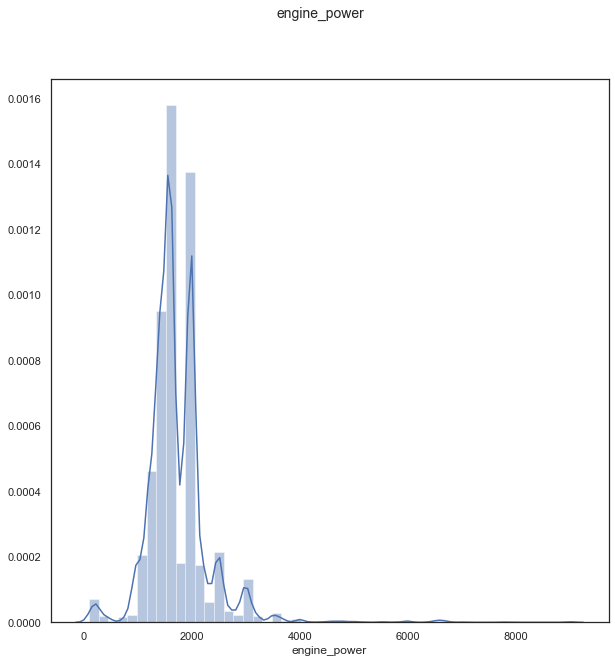

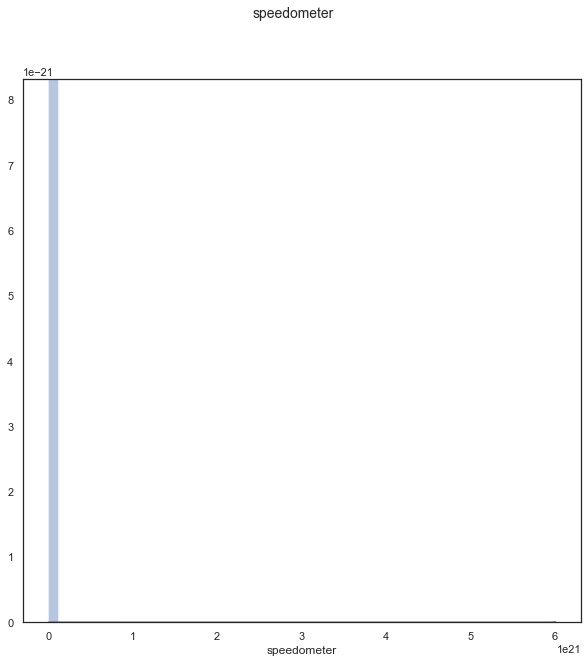

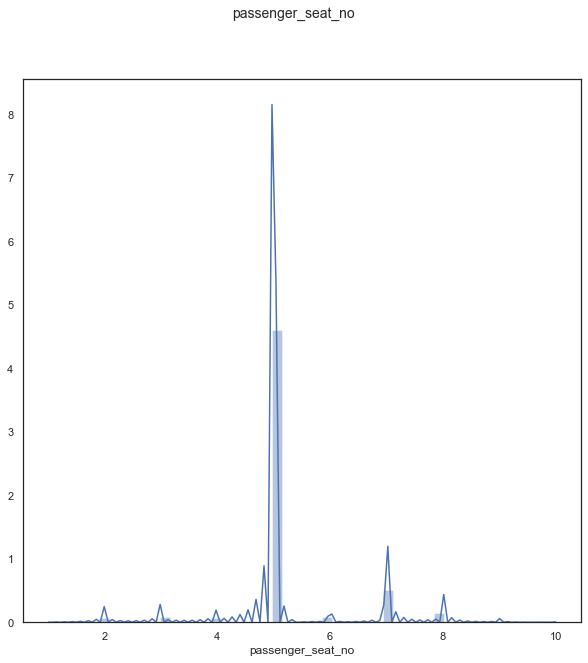

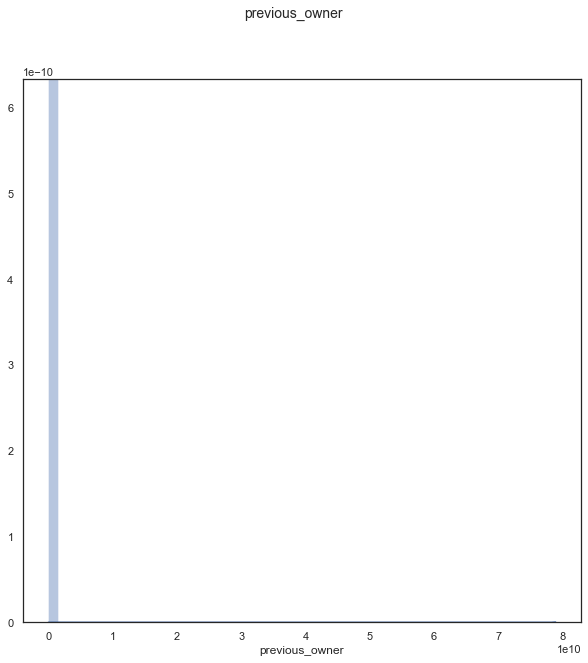

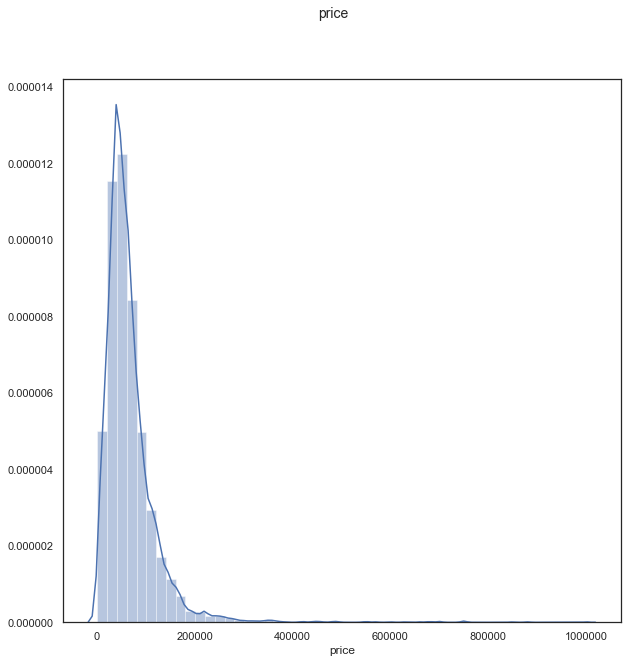

In [38]:
def plots_(data,feature): 
        fig, ax = plt.subplots(1, figsize=(10,10), sharey=True)
        fig.suptitle(feature, fontsize=14)
        sns.distplot(data[feature], ax=ax)
        plt.show()

for feature_ in df:
    #feature=plots_(numeric_df, feature_)
    if(df[feature_].dtype == np.float64 or df[feature_].dtype == np.int64):
        plots_(df,feature_)

In [39]:
# the correlation helps us to drop any feature that is highly correlation 
df.corr()

,model_year,engine_power,speedometer,passenger_seat_no,previous_owner,price
model_year,1.000000,-0.092147,-0.018932,0.033478,-0.034221,0.439547
engine_power,-0.092147,1.000000,0.005313,0.270413,0.004289,0.235998
speedometer,-0.018932,0.005313,1.000000,-0.002764,-0.000146,-0.008880
passenger_seat_no,0.033478,0.270413,-0.002764,1.000000,-0.002764,0.147787
previous_owner,-0.034221,0.004289,-0.000146,-0.002764,1.000000,-0.007186
price,0.439547,0.235998,-0.008880,0.147787,-0.007186,1.000000


### Feature Engineering

In [40]:
numeric_df_ = df[['engine_power','speedometer','previous_owner','price']] 
numeric_df_ = np.log(numeric_df_)

In [41]:
numeric_df_

,engine_power,speedometer,previous_owner,price
0,7.600902,11.225243,0.000000,11.512925
1,7.824046,11.775290,0.693147,11.002100
2,7.377759,11.775290,0.693147,10.680516
4,7.090077,10.545341,0.693147,10.896739
5,7.600902,10.545341,-inf,12.230765
...,...,...,...,...
6859,6.907755,11.775290,0.693147,10.714418
6860,7.783224,-inf,0.693147,10.778956
6861,7.377759,10.819778,0.693147,11.373663
6862,7.696213,4.605170,0.693147,11.744037


In [42]:
numeric_df_.replace([np.inf, -np.inf], 0, inplace=True)

In [43]:
numeric_df_

,engine_power,speedometer,previous_owner,price
0,7.600902,11.225243,0.000000,11.512925
1,7.824046,11.775290,0.693147,11.002100
2,7.377759,11.775290,0.693147,10.680516
4,7.090077,10.545341,0.693147,10.896739
5,7.600902,10.545341,0.000000,12.230765
...,...,...,...,...
6859,6.907755,11.775290,0.693147,10.714418
6860,7.783224,0.000000,0.693147,10.778956
6861,7.377759,10.819778,0.693147,11.373663
6862,7.696213,4.605170,0.693147,11.744037


In [44]:
LE = LabelEncoder()
model_year_column = df['model_year']
model_year_column = LE.fit_transform(model_year_column)

In [45]:
categorical_df = df[['name','color','fuel','origin','gear_type', 'status','bi_condition','bi_glass','bi_license', 'bi_radio', 'bi_alert','bi_cushion','bi_sunroof','bi_wheels','bi_seat_type','bi_payment_option','bi_lock_system']]

In [46]:
column_transformer = OneHotEncoder(handle_unknown='ignore',sparse=False)

transformed_data = column_transformer.fit_transform(categorical_df)
transformed_categorical_df = pd.DataFrame(transformed_data, columns=column_transformer.get_feature_names(['name','color','fuel','origin','gear_type', 'status','bi_condition','bi_glass','bi_license', 'bi_radio', 'bi_alert','bi_cushion','bi_sunroof','bi_wheels','bi_seat_type','bi_payment_option','bi_lock_system']))
transformed_categorical_df

,name_Dodge Massey ferguson,name_Dodge رام,name_أفيكو 50c18دبل كابينه,name_أفيكو 150E25,name_أفيكو 2000,name_أفيكو 2007,name_أفيكو 2010,name_أفيكو 50C13,name_أفيكو 65C18,name_أفيكو IVIECO 50C15CH,...,bi_sunroof_فتحة سقف,bi_sunroof_لا يوجد,bi_wheels_جنطات مغنيسيوم,bi_wheels_لا يوجد,bi_seat_type_فرش جلد,bi_seat_type_لا يوجد,bi_payment_option_إمكانية التقسيط,bi_payment_option_نقدا فقط,bi_lock_system_إغلاق مركزي,bi_lock_system_لا يوجد
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
6859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
6860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
6861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [47]:
df_modified = pd.DataFrame()
df_modified = pd.concat([numeric_df_, transformed_categorical_df], axis=1)

In [48]:
df_modified.shape

(6864, 698)

In [49]:
numeric_df_.shape

(6863, 4)

In [50]:
transformed_categorical_df.shape

(6863, 694)

In [51]:
df_modified.drop(6863, inplace=True)
df_modified.drop(3, inplace=True)

In [52]:
df_modified.shape

(6862, 698)

In [53]:
model_year_column = model_year_column[:6862]

In [54]:
model_year_column.shape

(6862,)

In [55]:
df_modified['model_year'] = model_year_column

In [56]:
df_modified

,engine_power,speedometer,previous_owner,price,name_Dodge Massey ferguson,name_Dodge رام,name_أفيكو 50c18دبل كابينه,name_أفيكو 150E25,name_أفيكو 2000,name_أفيكو 2007,...,bi_sunroof_لا يوجد,bi_wheels_جنطات مغنيسيوم,bi_wheels_لا يوجد,bi_seat_type_فرش جلد,bi_seat_type_لا يوجد,bi_payment_option_إمكانية التقسيط,bi_payment_option_نقدا فقط,bi_lock_system_إغلاق مركزي,bi_lock_system_لا يوجد,model_year
0,7.600902,11.225243,0.000000,11.512925,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,45
1,7.824046,11.775290,0.693147,11.002100,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,38
2,7.377759,11.775290,0.693147,10.680516,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,37
4,7.090077,10.545341,0.693147,10.896739,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,45
5,7.600902,10.545341,0.000000,12.230765,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,7.377759,10.819778,0.000000,10.819778,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,43
6859,6.907755,11.775290,0.693147,10.714418,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,46
6860,7.783224,0.000000,0.693147,10.778956,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,33
6861,7.377759,10.819778,0.693147,11.373663,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,49


### Model Selection 

In [58]:
df.drop(6863,inplace=True)
df.shape

(6862, 23)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = \
    train_test_split(df_modified.drop(columns=['price']),
                     df_modified['price'],
                     test_size=0.2,
                     random_state=42)

In [60]:
knn= KNeighborsRegressor(n_neighbors=100)
knn.fit(x_train, y_train)
knn_score = knn.score(x_test, y_test)

In [61]:
knn_score

0.5160055822859688

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(1)

model_ridge = Ridge(alpha=0.1)
poly_r_x_train = poly.fit_transform(x_train)
model_ridge.fit(poly_r_x_train, y_train)
poly_r_x_test = poly.fit_transform(x_test) 
ridge_score = model_ridge.score(poly_r_x_test,y_test)


model_lasso = Lasso(alpha=0.1)
poly_l_x_train = poly.fit_transform(x_train)
model_lasso.fit(poly_l_x_train,y_train)   
poly_l_x_test = poly.fit_transform(x_test)  
lasso_score = model_lasso.score(poly_l_x_test,y_test)

In [63]:
ridge_score

0.5374066593145546

In [64]:
lasso_score

0.4983474587258089

In [65]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree = decision_tree.fit(x_train,y_train)
predicted_DT = decision_tree.predict(x_test)
DT_score = decision_tree.score(x_test,y_test)

In [66]:
DT_score

0.3937101209886332

### Split data into pipline

In [67]:
from sklearn.pipeline import make_pipeline

In [68]:
y_train=pd.DataFrame(df['price'])
x_train=pd.DataFrame(df.drop(['price'],axis=1))
numeric_f = ['engine_power','speedometer','previous_owner','price']
categorical_f = ['name','color','fuel','origin','gear_type', 'status','bi_condition','bi_glass','bi_license', 'bi_radio', 'bi_alert','bi_cushion','bi_sunroof','bi_wheels','bi_seat_type','bi_payment_option','bi_lock_system']

In [116]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomTransform(BaseEstimator, TransformerMixin):

    def fit(self, numeric_df):
        return self
    def transform(numeric_df):
        numeric_df_copy = numeric_df
        return np.log(numeric_df_copy)

In [69]:
from sklearn.preprocessing import FunctionTransformer
numeric_df = df[['engine_power','speedometer','previous_owner','price']] 
def log_transform(numeric_df):
    return np.log(numeric_df)
transformer = FunctionTransformer(log_transform)

In [104]:
unique_arr = []
for column in numeric_df:
    unique_arr.append(numeric_df[column].unique())
flat_unique = [item for sublist in unique_arr for item in sublist]
flat_unique
unique_num = set(flat_unique)

In [70]:
categorical_df_ = df[['name','color','fuel','origin','gear_type', 'status','bi_condition','bi_glass','bi_license', 'bi_radio', 'bi_alert','bi_cushion','bi_sunroof','bi_wheels','bi_seat_type','bi_payment_option','bi_lock_system']]
unique_arr = []
for column in categorical_df:
    unique_arr.append(categorical_df[column].unique())
flat_unique = [item for sublist in unique_arr for item in sublist]
flat_unique
unique_cat = set(flat_unique)

In [73]:
from sklearn_pandas import DataFrameMapper
# from sklearn_pandas import CategoricalImputer
LE = DataFrameMapper([
    
    ('model_year', LabelEncoder())
])

In [96]:
categorical_transformer = Pipeline(steps=[
("ohe" , OneHotEncoder(
        handle_unknown="ignore", 
        sparse=False,
        categories=[
            unique_cat
        ])
)
])

In [97]:
categorical_transformer_2 = ("le", LE)

In [118]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
transformers=[
('num', CustomTransform, numeric_f),
('cat', categorical_transformer),
('cat_2', categorical_transformer_2)
])


In [119]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
('model', model_ridge)
])

In [120]:
my_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  <class '__main__.CustomTransform'>,
                                                  ['engine_power',
                                                   'speedometer',
                                                   'previous_owner', 'price']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(categories=[{'Dodge '
                                                                                              'Massey '
                                                                                              'ferguson',
                                                                                              'Dodge '
                                                                

In [121]:
import pickle
import sys 
sys.setrecursionlimit(4500)
with open('model_pkl', 'wb') as file:
    pickle.dump(my_pipeline, file)